In [1]:
# basics
import numpy as np
import pandas as pd
import scipy.stats as stats

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.plotting import scatter_matrix


# preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

# model selection
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression

# enable reload of changed files
%load_ext autoreload
%autoreload 2

# plot inline
%matplotlib inline

# Data Science Notebook

In [2]:
df = pd.read_csv('data/cars.csv')
df = df.iloc[:,1:-1]; df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,eight,307.0,130,3504.0,12.0,70,USA
1,15.0,eight,350.0,165,3693.0,11.5,70,USA
2,18.0,eight,318.0,150,3436.0,11.0,70,USA
3,16.0,eight,304.0,150,3433.0,12.0,70,USA
4,17.0,eight,302.0,140,3449.0,10.5,70,USA


In [3]:
# hp and weight are bad
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    object 
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.0+ KB


In [4]:
# displacement is suspect
df.describe().T.iloc[:,-5:]

,min,25%,50%,75%,max
mpg,9.0,17.500,23.0,29.000,46.6
displacement,-2000.0,104.250,148.5,265.750,30000.0
weight,1613.0,2227.500,2811.0,3614.750,5140.0
acceleration,8.0,13.825,15.5,17.175,24.8
model,70.0,73.000,76.0,79.000,82.0


# Missing Values

In [5]:
# check for missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          6
acceleration    0
model           0
origin          0
dtype: int64

In [6]:
df.weight.mean()

2976.658163265306

In [7]:
df['weight'] = df.weight.fillna(df.weight.mean())

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model           0
origin          0
dtype: int64

# Ordinal Values

In [9]:
df.cylinders.unique()

array(['eight', 'four', 'six', 'three', 'five'], dtype=object)

In [10]:
df['cylinders'] = df.cylinders.map({'eight':8, 'four':4, 'six':6, 'three': 3, 'five':5})

In [11]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

# Nominal Values

In [12]:
df.origin

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Canada
395       USA
396       USA
397       USA
Name: origin, Length: 398, dtype: object

In [13]:
df[['Mexico', 'USA']] = pd.get_dummies(df.origin, drop_first=True)

In [14]:
df = df.drop('origin', axis=1)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,Mexico,USA
0,18.0,8,307.0,130,3504.0,12.0,70,0,1
1,15.0,8,350.0,165,3693.0,11.5,70,0,1
2,18.0,8,318.0,150,3436.0,11.0,70,0,1
3,16.0,8,304.0,150,3433.0,12.0,70,0,1
4,17.0,8,302.0,140,3449.0,10.5,70,0,1


# Garbage

In [16]:
(~df.horsepower.str.isnumeric()).sum()

9

In [17]:
mean_hp = df[df.horsepower.str.isnumeric()].horsepower.astype('int64').mean()

In [18]:
hp = pd.to_numeric(df.horsepower, errors='coerce')
df['horsepower'] = hp.fillna(hp.mean())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   Mexico        398 non-null    uint8  
 8   USA           398 non-null    uint8  
dtypes: float64(5), int64(2), uint8(2)
memory usage: 22.7 KB


# Outliers

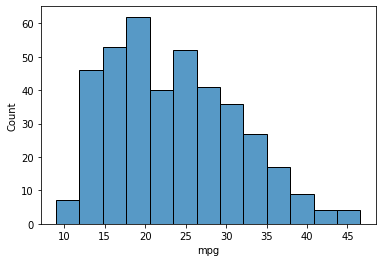

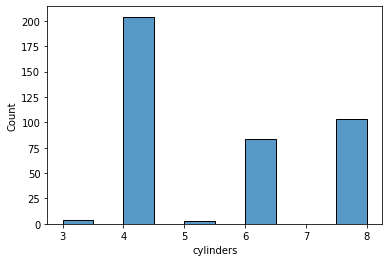

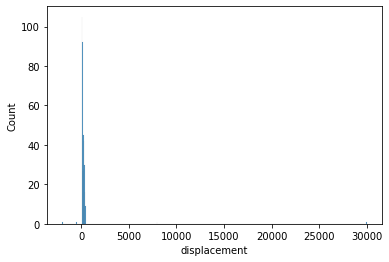

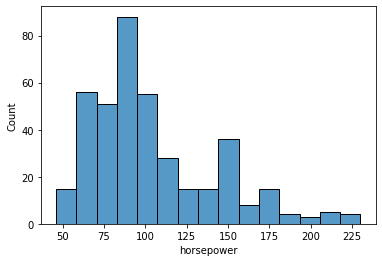

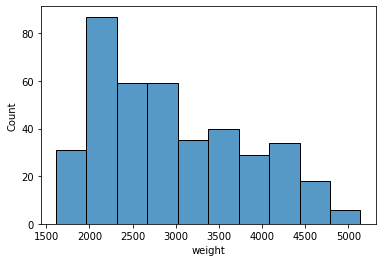

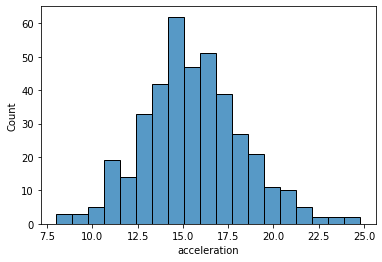

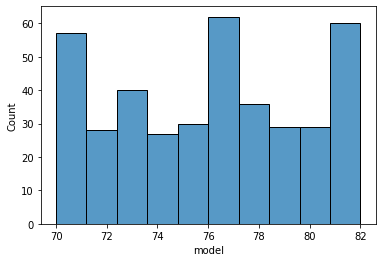

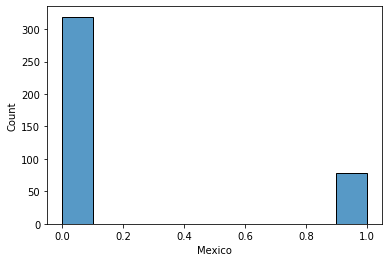

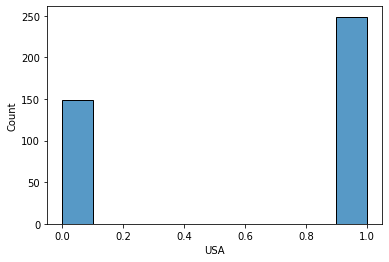

In [20]:
for c in df.columns:
    sns.histplot(data = df[c])
    plt.show()

In [21]:
(np.abs(StandardScaler().fit_transform(df.displacement.to_numpy().reshape(-1,1)).flatten()) > 4).sum()

2

In [22]:
np.roll(df.displacement.sort_values().to_numpy(), 2)[:10]

array([ 8000., 30000., -2000.,  -500.,    68.,    70.,    70.,    70.,
          71.,    71.])

In [23]:
df = df[np.abs(stats.zscore(df.displacement)) < 0.5]

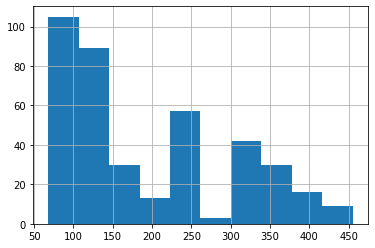

In [24]:
df.displacement.hist();

# Visualizations

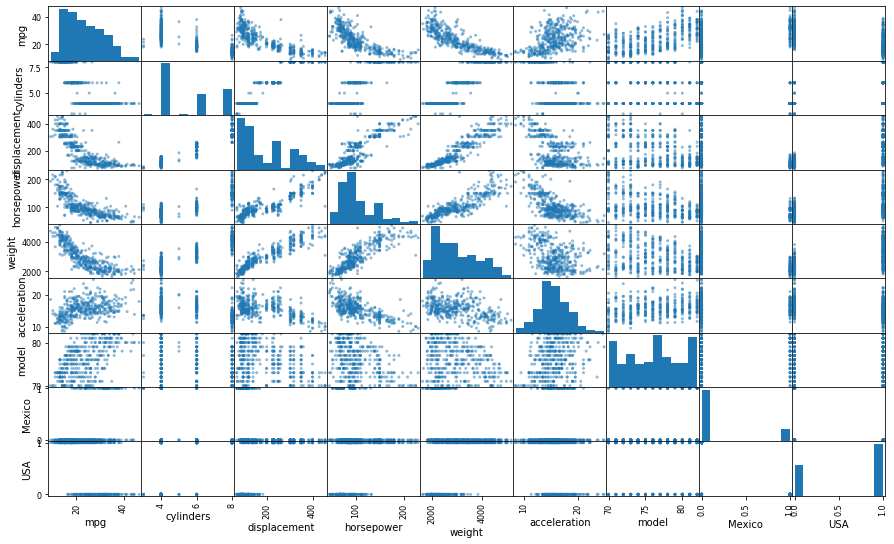

In [25]:
scatter_matrix(df, figsize=(15, 9));

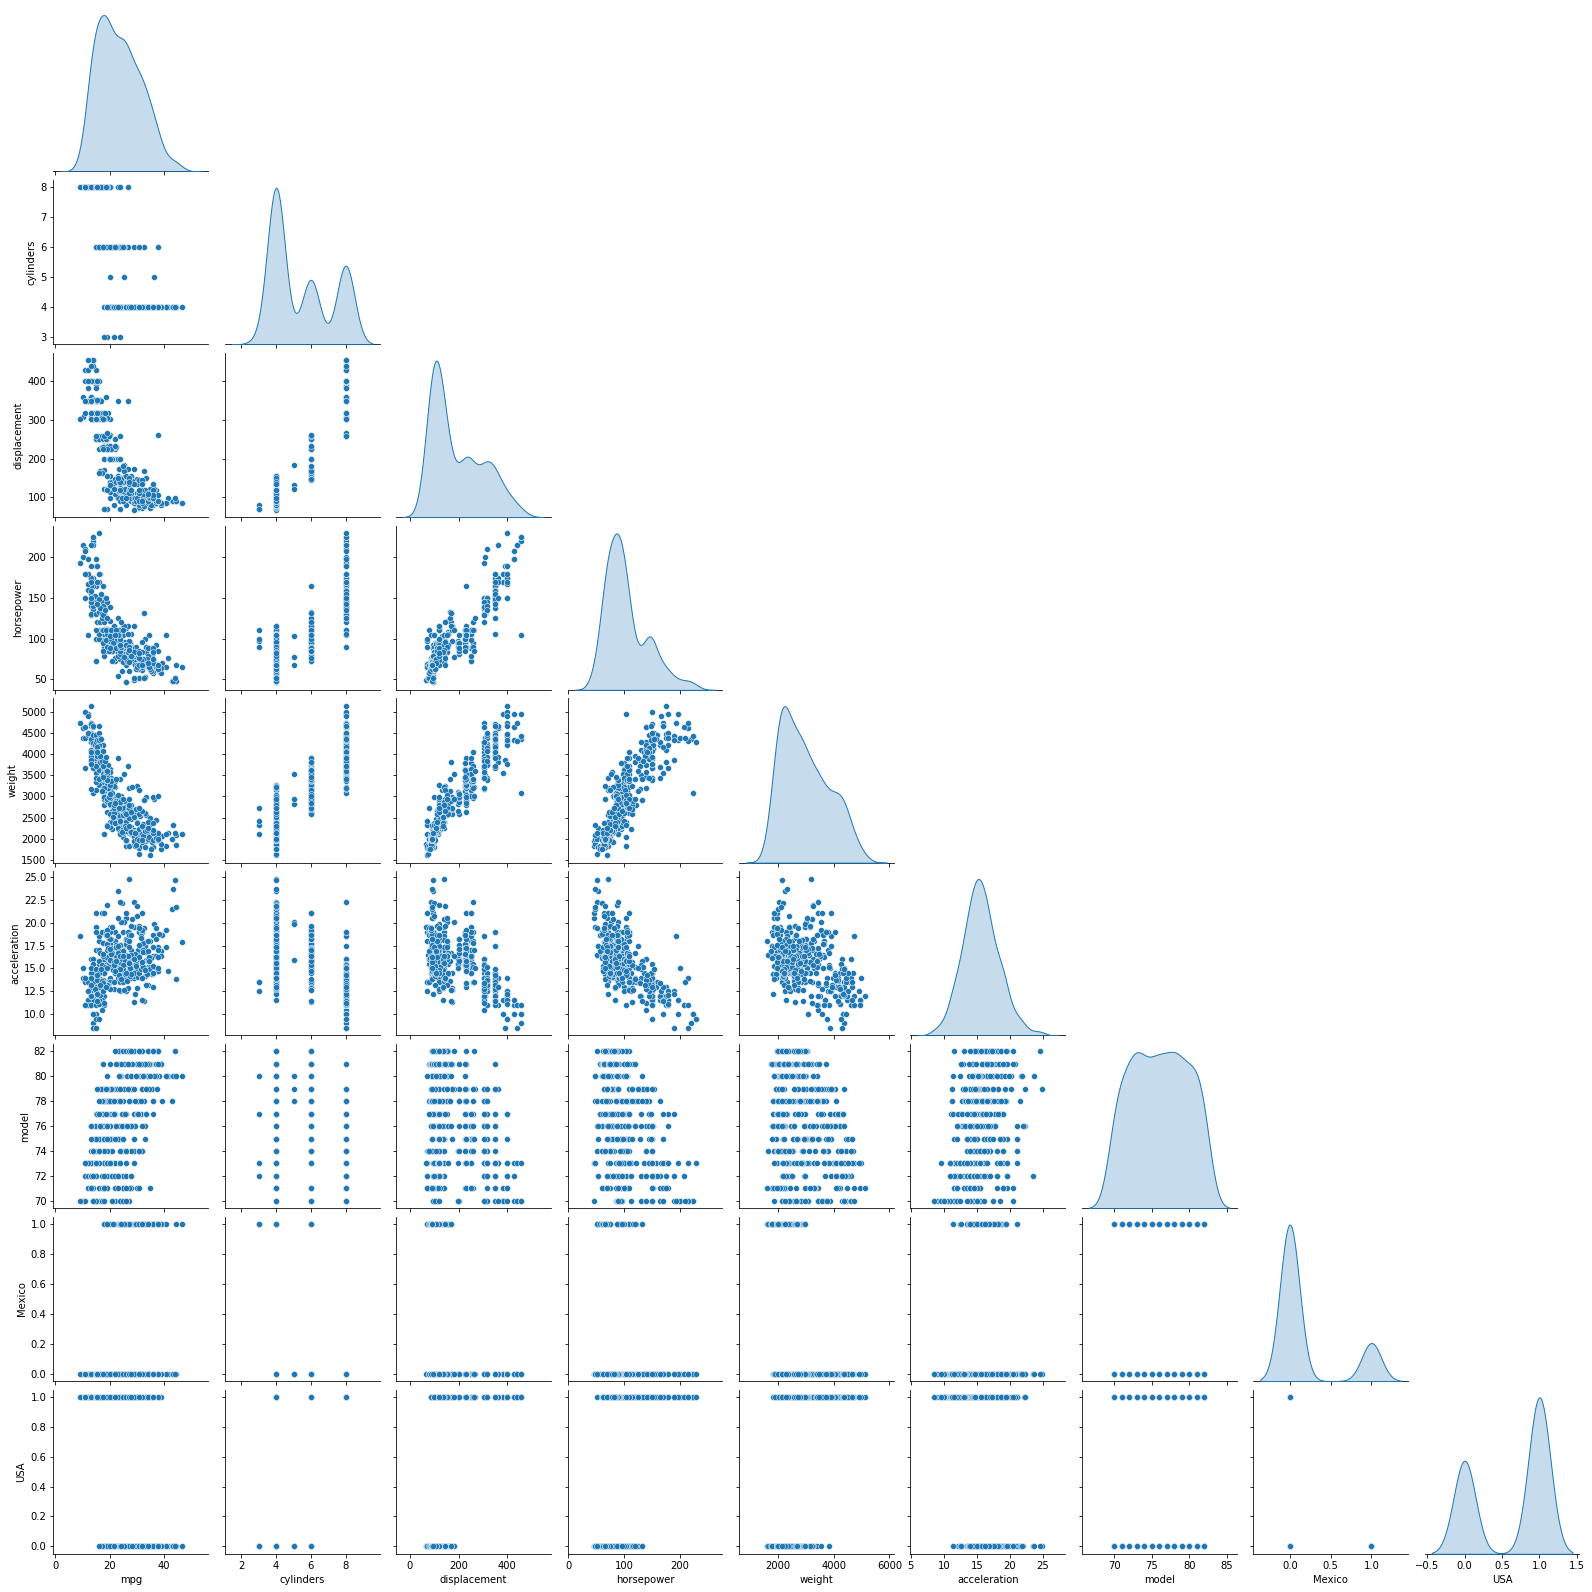

In [26]:
sns.pairplot(df, diag_kind='kde', corner=True);

# Modeling

In [27]:
y = df.mpg
X = df.iloc[:,1:]

In [28]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [29]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model,Mexico,USA
0,8,307.0,130.0,3504.0,12.0,70,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,1


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [41]:
# try scaling

# Grid Search

In [31]:
parameters = {}
model = LinearRegression()
clf = GridSearchCV(model, parameters,cv=5, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             verbose=2)

In [32]:
clf.best_score_, clf.best_params_

(0.8173593552932747, {})

In [33]:
parameters = {'alpha': np.logspace(-5, 5)}
model = Ridge()
clf = GridSearchCV(model, parameters,cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             verbose=1)

In [34]:
clf.best_score_, clf.best_params_

(0.8180426372142116, {'alpha': 8.286427728546842})

In [35]:
parameters = {'alpha': np.logspace(-5, 5)}
model = Lasso()
clf = GridSearchCV(model, parameters,cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             verbose=1)

In [36]:
clf.best_score_, clf.best_params_

(0.8173713555099799, {'alpha': 0.004498432668969444})

In [37]:
parameters = {'n_neighbors': range(2, 50), 'metric': ['manhattan', 'euclidean']}
model = KNeighborsRegressor()
clf = GridSearchCV(model, parameters,cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(2, 50)},
             verbose=1)

In [38]:
clf.best_score_, clf.best_params_

(0.7192953538734618, {'metric': 'manhattan', 'n_neighbors': 30})

# Final Model

In [40]:
final = Lasso(alpha=0.004498432668969444).fit(X_train, y_train)
final.score(X_test, y_test)

0.7626341027234724